# Esercizio 1.2

Ho aggiunto al generatore di numeri pseudo-casuali le distribuzioni di probabilità, generate utilizzando il metodo della trasformata:
1. esponenziale:  $p(x) = \lambda \exp(-\lambda x)$,    $x\in [0;+\infty]$
2. lorentziana (di Cauchy-Lorentz):  $p(x) = \frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.  

Sono mostrati 4 gruppi di 3 istrogrammi, ottenuti da $10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ con $N$ pari rispettivamente a $1, 2, 10, 100$. La variabile random $x_i$ è campionata da distribuzioni *standard*, *esponenziale* ($\lambda=1$) e *lorentziana* ($\mu=0$, $\Gamma=1$).

La $x$ che segue una PDF esponenziale è data da: &nbsp;&nbsp;&nbsp;&nbsp; $x = -{1\over\lambda}\ln(1-y)$

La variabile aleatoria con una PDF lorentziana è della forma: &nbsp;&nbsp; $ x = \mu + \Gamma\tan{(\pi(y-\frac{1}{2}))} $

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import scipy.stats
import subprocess

subprocess.run("make clean", shell=True, stdout=subprocess.PIPE)
subprocess.run("make", shell=True, stdout=subprocess.PIPE)
subprocess.run("make esegui", shell=True, stdout=subprocess.PIPE)

CompletedProcess(args='make esegui', returncode=0, stdout=b'./main.exe\n')

## Istrogrammi

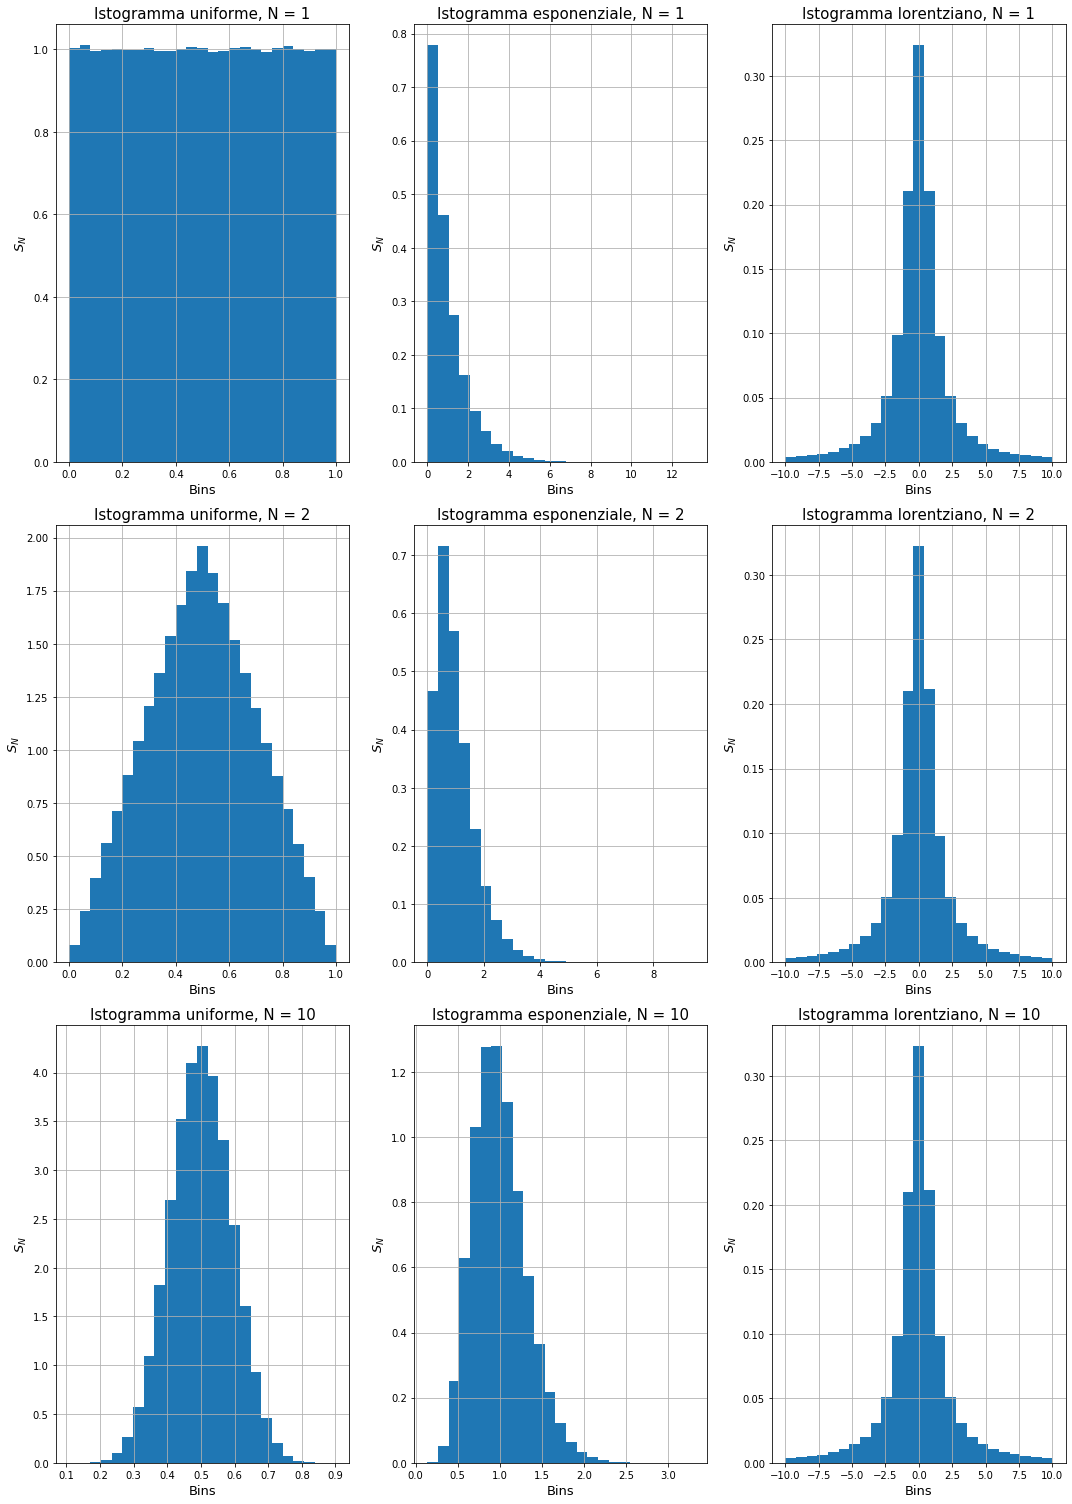

In [2]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,21))
names = ['uniforme', 'esponenziale', 'lorentziano' ]
num_bins = 25   # Istrogramma
N = [1,2,10,100]

for l in range(3):
    datu, date, datl = (np.genfromtxt("file%d.txt" % N[l], usecols=i, autostrip=True) for i in range(3))
    dat = [datu, date, datl]
    for j in range(3):   # Istogrammi
        if j == 2:
            ax[l, j].hist(dat[j], bins=num_bins, range=(-10.,10.), density = True)
        else:
            ax[l, j].hist(dat[j], bins=num_bins, density = True)
        ax[l, j].set_xlabel('Bins', fontsize=13)
        ax[l, j].set_ylabel(r'$S_N$', fontsize=13)
        ax[l, j].set_title('Istogramma %s, N = %d' % (names[j],N[l]), fontsize=15)
        ax[l, j].grid(True)
        
fig.tight_layout()
plt.show()

## N = 100

Per questo valore di N si nota come le $S_N$ convergono a una PDF gaussiana nel caso della distribuzione uniforme e di quella esponenziale ( teorema del limite centrale ). Nel caso in cui le variabili random seguano una PDF lorentziana la distribuzione di probabilità limite sarà una distribuzione di Cauchy-Lorentz.

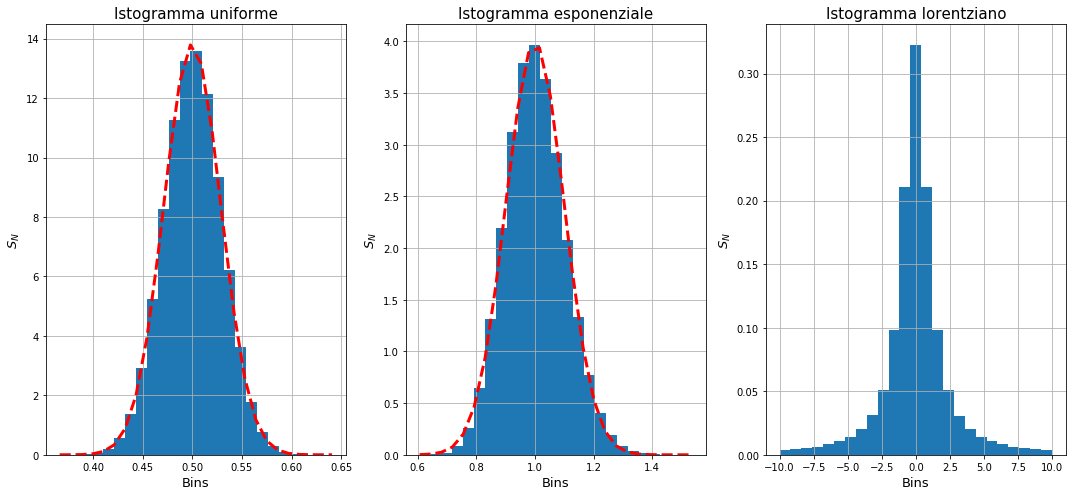

In [3]:
# Caricamento dati da file
datu, date, datl = (np.genfromtxt("file%d.txt" % N[3], usecols=i, autostrip=True) for i in range(3))
dat = [datu, date, datl]

# Istogrammi
fig1, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(15,7))

for j in range(3):
    if j != 2:      # Fit gaussiani
        ax1[j].hist(dat[j], bins=num_bins, color="tab:blue", ec="tab:blue", density = True)
        n, bins, patches = ax1[j].hist(dat[j], bins = num_bins, density = True, color = None)
        (mu, sigma) = scipy.stats.norm.fit(dat[j])
        y = scipy.stats.norm.pdf(bins, mu, sigma)
        ax1[j].plot(bins, y, 'r--', linewidth = 3)
    else:
        ax1[j].hist(dat[j], bins=num_bins, range=(-10.,10.), density = True)
    ax1[j].set_xlabel('Bins', fontsize=13)
    ax1[j].set_ylabel(r'$S_N$', fontsize=13)
    ax1[j].set_title('Istogramma %s' %  names[j], fontsize=15)
    ax1[j].grid(True)

        
fig1.tight_layout()
plt.show()